## Importing the Dataset

Importing necessary libraries for data analysis

In [105]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math

Importing .csv in our dataframe

In [106]:
df = pd.read_csv('data/dataset_completo.csv', sep=';')
df['Age'] = df['Age'].str.replace(',','.').astype(float)
df['Name'] = df['Name'].fillna('')
df = df.dropna(subset=['Survived'])
df

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,"14,4542",NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,"14,4542",NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,"7,2250",NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,"7,2250",NaN,C,NaN,NaN,NaN


In [107]:
{
    "age" : "Age",
    "lived" : "Survived",
    "name" : "Name",
    "ID" : "PassengerId",
    "sex" : "Sex"
}

{'age': 'Age',
 'lived': 'Survived',
 'name': 'Name',
 'ID': 'PassengerId',
 'sex': 'Sex'}

---

Before we dive (pun intended :p ) in the actual data analysis, we need to take a look at the missing values in our dataset. We're also going to explore some strategies to fill those holes.

## Exploring Missing Values

In [108]:
DataFrame(df.isna().sum(), columns=['']).T

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,boat,body,home.dest
,0,0,0,0,263,0,0,0,1,1014,2,823,1188,564


As we can see most columns don't have missing values (only Age and Embarked).

Considering that Age is actually an important demographic information for our research, we will try to recover as much data as we can with an informed approach. 

In [109]:
def extract_title(name):
    pieces_of_name = name.split()
    for word in pieces_of_name:
        if '.' in word:
            return word

df['Title'] = df['Name'].apply(extract_title)
df['Title'].value_counts()

Title
Mr.          757
Miss.        260
Mrs.         197
Master.       61
Dr.            8
Rev.           8
Col.           4
Major.         2
Mlle.          2
Ms.            2
Lady.          1
Capt.          1
Mme.           1
Sir.           1
Jonkheer.      1
Dona.          1
Don.           1
Countess.      1
Name: count, dtype: int64

In [110]:
averages = df[['Title', 'Age']].groupby('Title').mean()
df = df.join(averages, rsuffix='avg', on="Title")
df['AgeFilled'] = df['Age'].fillna(value=df['Ageavg'])
df

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,boat,body,home.dest,Title,Ageavg,AgeFilled
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO",Miss.,21.774207,29.000000
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master.,5.482704,0.916700
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss.,21.774207,2.000000
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr.,32.252151,30.000000
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs.,36.994118,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,"14,4542",NaN,C,NaN,328.0,NaN,Miss.,21.774207,14.500000
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,"14,4542",NaN,C,NaN,NaN,NaN,Miss.,21.774207,21.774207
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,"7,2250",NaN,C,NaN,304.0,NaN,Mr.,32.252151,26.500000
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,"7,2250",NaN,C,NaN,NaN,NaN,Mr.,32.252151,27.000000


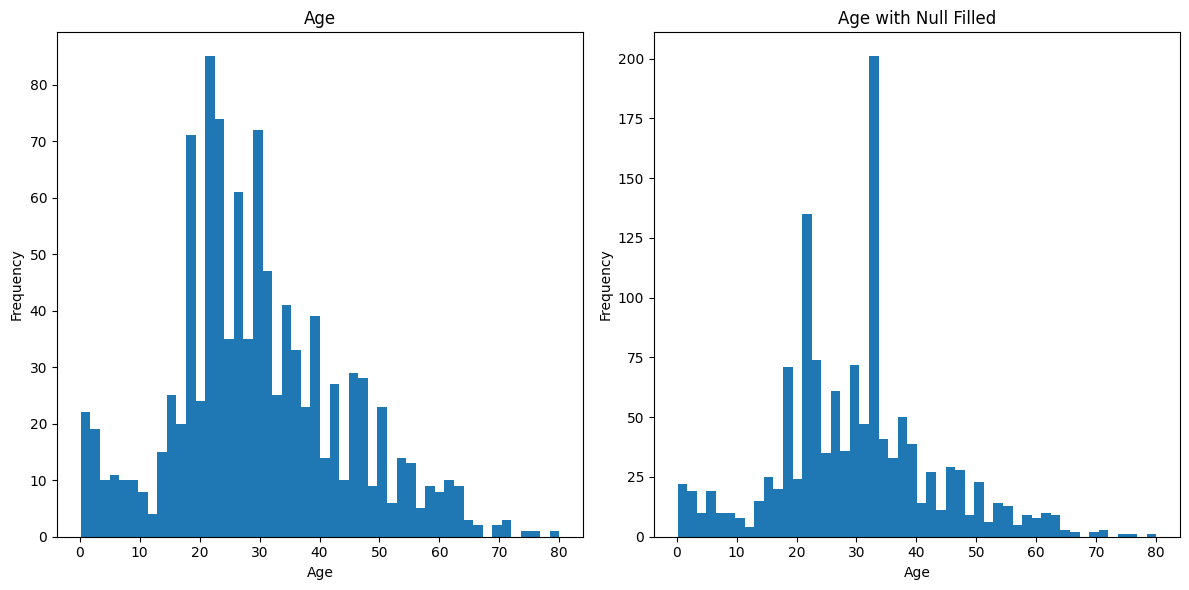

In [111]:
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization

plt.subplot(1, 2, 1)
plt.title("Age")
plt.hist(df["Age"], bins=50)
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.title("Age with Null Filled")
plt.hist(df['AgeFilled'], bins=50)
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

---

## Feature Analysis

Importing dictionary in the dataset.

In [112]:
df_dict = pd.read_csv('data/dictionary.csv')
display(df_dict)

,Variable,Definition,Key
0,survival,Survival,"0 = No, 1 = Yes"
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,sex,Sex,NaN
3,Age,Age in years,NaN
4,sibsp,# of siblings / spouses aboard the Titanic,NaN
5,parch,# of parents / children aboard the Titanic,NaN
6,ticket,Ticket number,NaN
7,fare,Passenger fare,NaN
8,cabin,Cabin number,NaN
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


#### Let's review the type of variables we have right now.

<style>
  table {
    margin: 0;
    width: 80%; 
  }
  td {
    text-align: left;
    /*padding: 8px;*/
  }
  th
  {
    text-align: left;
  }
</style>

<table>
    <tr>
        <td><b>Categoricals</b>: 
            <ul>
                <li>Sex (male/female);</li>
                <li>Pclass (3rd/2nd/1st);</li>
                <li>Embarked (port);</li>
                <li>Survived (true/false).</li>
            </ul> 
        </td>
        <td><b>Ordinals</b>:
            <ul>
                <li>Pclass (3rd/2nd/1st);</li>
                <li>Sibsp (siblings+spouse);</li>
                <li>Parch (parents+children).</li>
            </ul>
        </td>
    </tr>
    <tr>
        <td><b>Continual</b>:
            <ul>
                <li>Age;</li>
                <li>Fare (price of ticket).</li>
            </ul>
        </td>
        <td><b>Everything else</b>:
            <ul>
                <li>PassengerId;</li>
                <li>Name;</li>
                <li>Cabin.</li>
            </ul>
        </td>
    </tr>
</table>


---

## Survived

### Survival analysis (categorical variable)

Here, we're going to explore the most important variable for our analysis: how many people survived and how many didn't. The column 'Survived' serves as the dependent variable, determining the all outcome we're focusing on.

In [113]:
df_survived = df['Survived'].value_counts(dropna=False)
df_survived

Survived
0.0    809
1.0    500
Name: count, dtype: int64

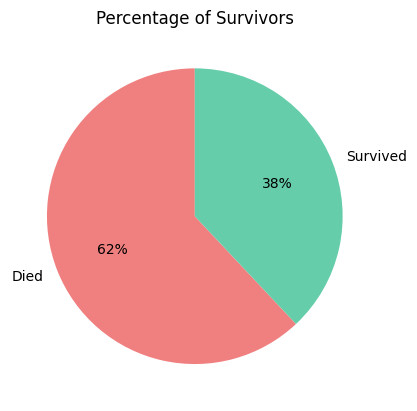

In [114]:
# DATA
df_survived_relative = df['Survived'].value_counts(dropna=False, normalize=True) *100
df_survived_relative = df_survived_relative.round()
values = list(df_survived_relative)

# COLORS
died_color = "#F08080" # (light coral)
survived_color = "#66CDAA" # (medium aqua marine)

# CHART
plt.pie(values, labels=["Died", "Survived"], colors=[died_color, survived_color], autopct='%1.f%%',startangle=90)
plt.title('Percentage of Survivors')
plt.show()

From the survivor analysis, we can see that the majority of passengers did not survive.

Many lives were lost due to the insufficient number of lifeboats (Source: British Inquiry, 1912 https://www.titanicinquiry.org/ ).

To understand this further, we'll explore how survival rates differed between males and females.

---

## Sex

### Analysis of Sex gender relations (Categorical Variable).

#### Relation between sex gender and survival rates

In [115]:
gender_survived = df.groupby(by=['Sex', 'Survived'])['Survived'].count()

pivot_table = gender_survived.unstack(level=-1).reset_index().rename(columns={0: 'Died', 1: 'Survived'}).rename_axis(columns={'Survived': ''})

pivot_table['Total'] = pivot_table['Died'] + pivot_table['Survived']

display(pivot_table.style.hide(axis='index'))

Sex,Died,Survived,Total
female,127,339,466
male,682,161,843


Let's analyse the data with some graphs.

In the first one let's see how many male survived and how many females. Maybe chivalry made a difference in survival rate?

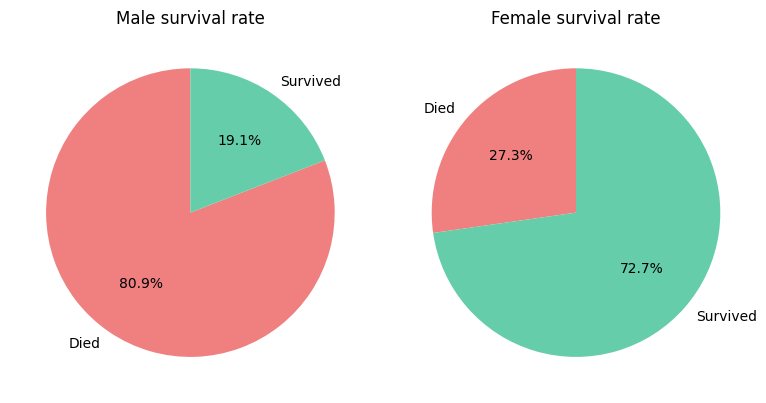

In [116]:
# DATA 
male_Survived = gender_survived.get('male')
female_Survived = gender_survived.get('female')

# CHART
plt.figure(figsize=(8, 4)) 
male_survived = gender_survived.get('male')

plt.subplot(1, 2, 1)
plt.title("Male survival rate")
plt.pie(male_Survived, labels=["Died", "Survived"], autopct='%1.1f%%', colors=[died_color, survived_color], startangle=90)

female_survived = gender_survived.get('female')

plt.subplot(1, 2, 2)
plt.title("Female survival rate")
plt.pie(female_Survived, labels=["Died", "Survived"], autopct='%1.1f%%', colors=[died_color, survived_color], startangle=90)

plt.tight_layout()
plt.show()

In the following graph we're going to show the relation between gender and survival rate in the bigger scheme.

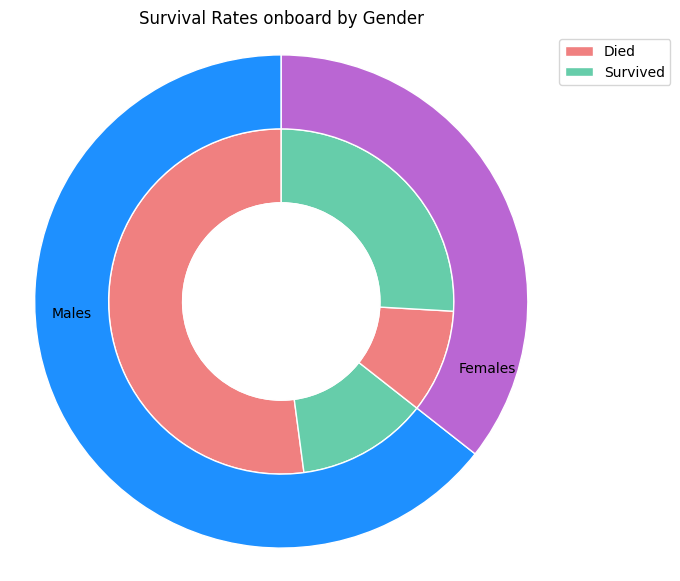

In [117]:
# DATA
# Inner ring data: Male died/survived ; Female died/survived 
Sex_Survived_values = [
    male_Survived.get(0), male_Survived.get(1),
    female_Survived.get(0),  female_Survived.get(1)]

# Outer ring data: Male / Female percentage on board
df_sex_on_board = df['Sex'].value_counts()
percentage_sex_on_board = df['Sex'].value_counts(dropna=False, normalize=True) *100
sex_on_board_values = list(percentage_sex_on_board)

# COLORS
female_color = "#BA66D3" #(medium orchid)
male_color = "#1E90FF" #(dodger blue)

# CAHRT
fig, ax = plt.subplots(figsize=(7, 7))

# Inner ring 
ax.pie(Sex_Survived_values, 
       colors=[died_color, survived_color, died_color, survived_color],
       labels=['Males','','Females',''],
       radius=0.7, 
       wedgeprops=dict(width=0.3, edgecolor='w'), 
       #autopct='%1.1f%%', 
       startangle=90)

# Outer ring
ax.pie(sex_on_board_values,
       colors=[male_color, female_color], 
       radius=1, 
       wedgeprops=dict(width=0.3, edgecolor='w'), 
       #autopct='%1.1f%%', 
       startangle=90)

# Circle at the center to create a donut chart effect
center_circle = plt.Circle((0, 0), 0.4, color='white')
ax.add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.title('Survival Rates onboard by Gender')

ax.legend(["Died", "Survived"], loc='upper left', bbox_to_anchor=(1, 1))


#plt.tight_layout()
plt.show()

In summary, we can observe a significant disparity in survival rates between genders aboard the Titanic.
 
Women had a markedly higher survival rate compared to men. Apparently chivarly did make a difference!

Historically, the Titanic followed a "women and children first" protocol during evacuation, which significantly influenced the survival outcomes. According to reports, a far higher percentage of women and children were saved compared to men, as lifeboats were prioritized for them. You can read more about this in The Titanic: A Survivor’s Story source https://www.encyclopedia-titanica.org/ .

To understand this further, we'll explore how survival rates differed between males and females with children or without.

---

## Parch

### Analysis of the childrens aboard (Ordinal Variable).

First let's anlayse the distribution of children on board

In [118]:
df['Died'] = 1 - df['Survived']
df_parch = df.groupby('Parch').sum()[['Survived','Died']]
df_parch.index = df_parch.index.astype(int)
df_parch

,Survived,Died
Parch,,
0,336.0,666.0
1,100.0,70.0
2,57.0,56.0
3,5.0,3.0
4,1.0,5.0
5,1.0,5.0
6,0.0,2.0
9,0.0,2.0


From these results we can observe that most people had no children on board. 

Let's analize if people with children survived more or not.

Text(0.5, 0, 'Number of children')

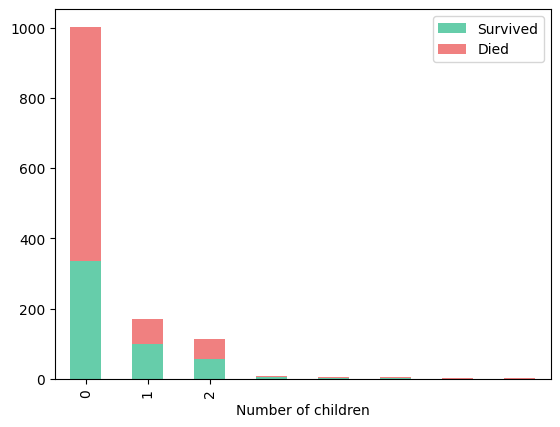

In [119]:

df_parch.plot.bar(stacked=True,color=[survived_color,died_color])

plt.xticks(ticks=[0, 1, 2], labels=['0', '1', '2'])
plt.xlabel("Number of children")


From these analysis we can deduce that 2/3 of people without children died, while around half of people with children saved themself.

So the "women and children first" protocol continues to emerge in our analysis.

Let's dive deeper in our analysis to undersdan the patterns.

---

## Age

In [120]:
print(
    " max =", df["Age"].max(), "\n",
    "min =", df["Age"].min(), "\n",
    "mean =", round(df["Age"].mean()), "\n",
    "median =", df["Age"].median()
    )

 max = 80.0 
 min = 0.1667 
 mean = 30 
 median = 28.0


In [121]:
df['LifeStage'] = 'NaN'
df.loc[df['AgeFilled'] < 8, 'LifeStage'] = 'Child' 
df.loc[(8 <= df['AgeFilled']) & (df['AgeFilled'] <= 19), 'LifeStage'] = 'Teenager'
df.loc[(20 <= df['AgeFilled']) & (df['AgeFilled'] <= 39), 'LifeStage'] = 'Adult'  
df.loc[(40 <= df['AgeFilled']) & (df['AgeFilled'] <= 59), 'LifeStage'] = 'Middle Age' 
df.loc[df['AgeFilled'] >= 60, 'LifeStage'] = 'Senior'
df_LifeStage = df['LifeStage'].value_counts()
df_LifeStage


LifeStage
Adult         830
Middle Age    206
Teenager      159
Child          74
Senior         40
Name: count, dtype: int64

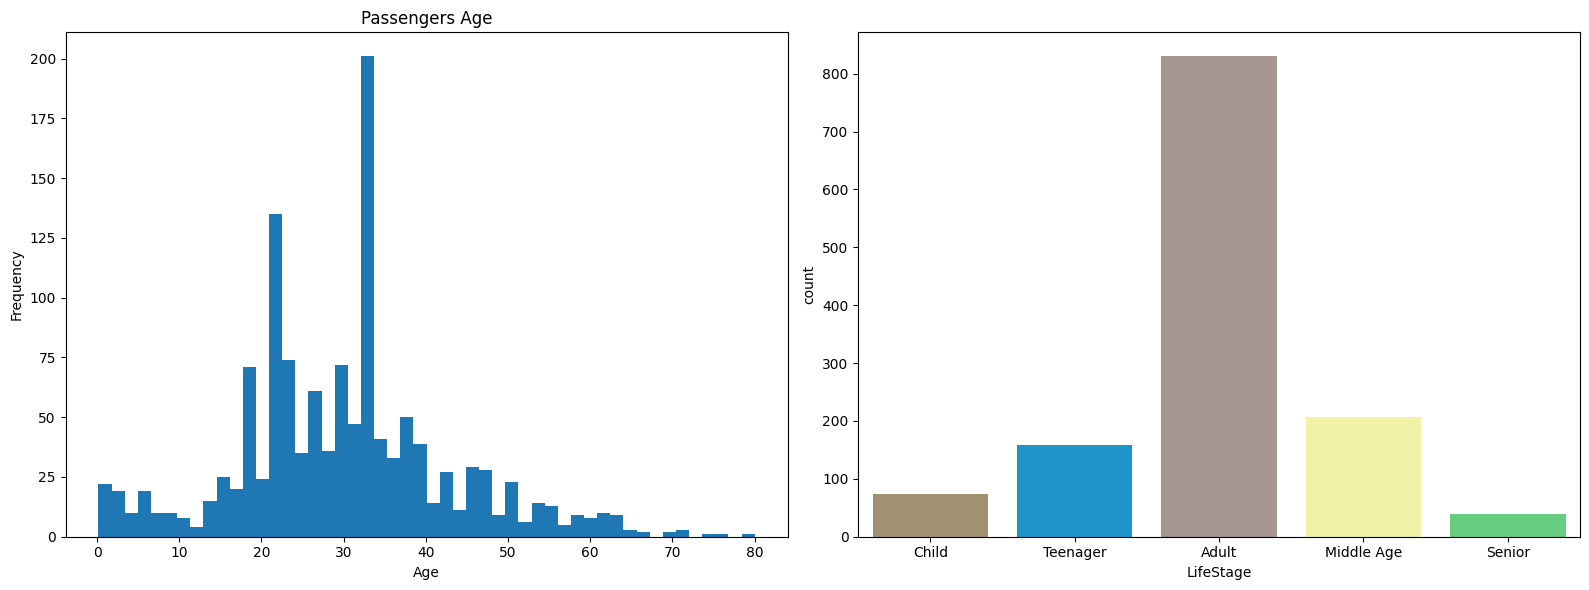

In [122]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
df["AgeFilled"].plot(kind="hist",
                     bins = 50, 
                     title="Passengers Age", 
                     xlabel="Age", 
                     ylabel="Frequency")

plt.subplot(1, 2, 2)
sns.countplot(x='LifeStage',
              hue='LifeStage',
              legend=False, 
              data = df, 
              palette = "terrain_r",
              order = ['Child', 'Teenager', 'Adult','Middle Age', 'Senior']);

plt.tight_layout()
plt.show()

In [123]:
df_LifeStage = df.groupby('LifeStage').sum()[['Survived', 'Died']]
df_ordered = ['Child', 'Teenager', 'Adult', 'Middle Age', 'Senior']

df_LifeStage = df_LifeStage.reindex(df_ordered)
df_LifeStage

,Survived,Died
LifeStage,,
Child,45.0,29.0
Teenager,64.0,95.0
Adult,295.0,535.0
Middle Age,84.0,122.0
Senior,12.0,28.0


<Axes: xlabel='LifeStage'>

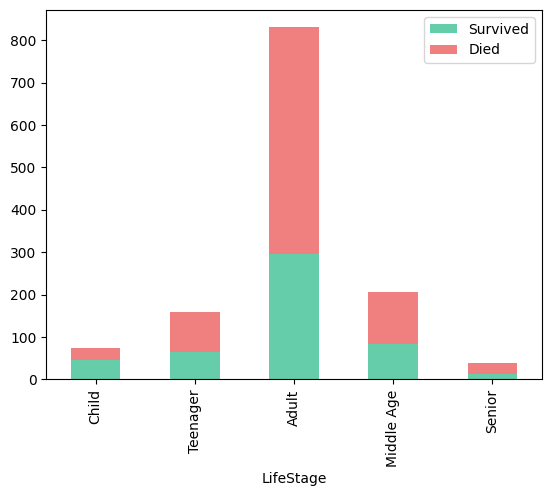

In [124]:
df_LifeStage.plot(kind="bar", stacked=True,color=[survived_color, died_color])

---

## Pclass


### Analysis of Ticket Class relations (Categorical Variable).

#### Relation between travel class and survival rates

In [125]:
class_survived = df.groupby(by=['Pclass', 'Survived'])['Survived'].count()

pivot_table = class_survived.unstack(level=-1).reset_index().rename(columns={0: 'Died', 1: 'Survived'}).rename_axis(columns={'Survived': ''})

pivot_table['Total'] = pivot_table['Died'] + pivot_table['Survived']

display(pivot_table.style.hide(axis='index'))
pivot_table = pivot_table.index.astype(int)

display(pivot_table)

Pclass,Died,Survived,Total
1.000000,123,200,323
2.000000,158,119,277
3.000000,528,181,709


RangeIndex(start=0, stop=3, step=1)

And again here's some graph and tables, this time showing the survival rate between passenger classes. Does the amount paid for the ticket made a difference?

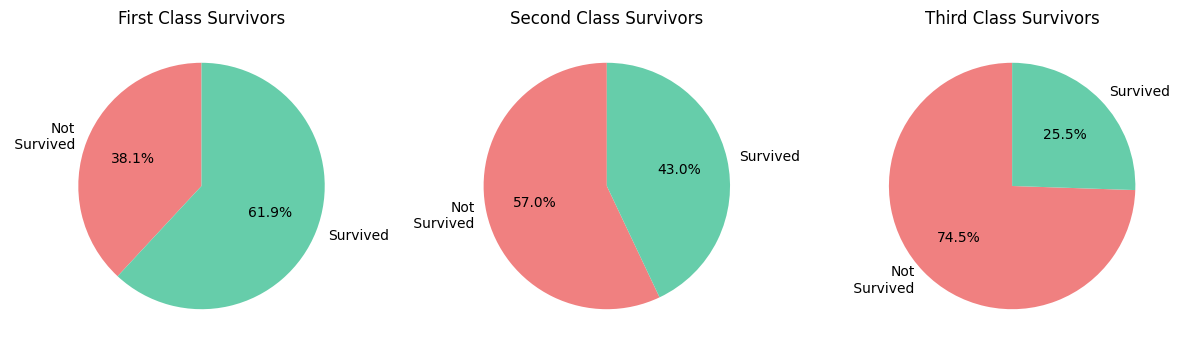

In [126]:
# COLORS
first_class_colors = ["#66FFFF", "#99FFFF", "#CCFFFF"] # (light blue)
second_class_colors = ["#66B2FF", "#99CCFF", "#CCE5FF"] # (blue)
third_class_colors = ["#6666FF", "#9999FF", "#CCCCFF"] # (dark blue/violet)

# DATA
class_survived = df.groupby(by=['Pclass', 'Survived'])['Survived'].count()

plt.figure(figsize=(12, 4))

# First class
plt.subplot(1, 3, 1)
first_class = class_survived.get(1)
plt.title("First Class Survivors")
plt.pie(first_class, labels=["Not\n Survived", "Survived"], autopct='%1.1f%%', 
    colors=[died_color, survived_color],startangle=90)

# Second class
plt.subplot(1, 3, 2)
second_class = class_survived.get(2)
plt.title("Second Class Survivors")
plt.pie(second_class, labels=["Not\n Survived", "Survived"], autopct='%1.1f%%', 
    colors=[died_color, survived_color],startangle=90)

# Third class
plt.subplot(1, 3, 3)
third_class = class_survived.get(3)
plt.title("Third Class Survivors")
plt.pie(third_class, labels=["Not\n Survived", "Survived"], autopct='%1.1f%%', 
    colors=[died_color, survived_color],startangle=90)

plt.tight_layout()
plt.show()

Let's assume that a more expensive passenger class corresponds a higher social status. 

From what we can see, most of the first class survived while most of the third class died.

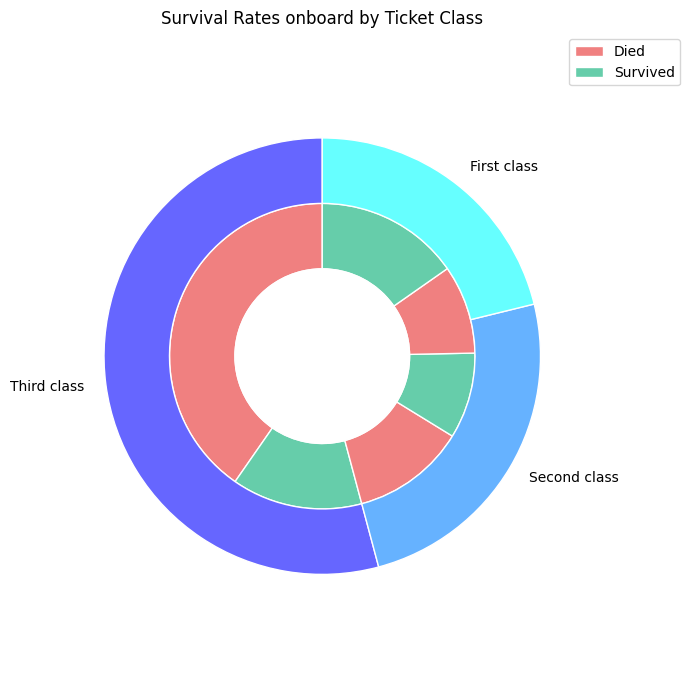

In [127]:
# DATA
# Inner ring data: Classes died/survived
Pclass_Survived_values = [
    third_class.get(0), third_class.get(1),
    second_class.get(0),  second_class.get(1),
    first_class.get(0),  first_class.get(1)]

# Outer ring data: Classes percentage on board
df_Pclass_on_board = df['Pclass'].value_counts()
percentage_Pclass_on_board = df['Pclass'].value_counts(dropna=False, normalize=True) *100
Pclass_on_board_values = list(percentage_Pclass_on_board)


# CHART
fig, ax = plt.subplots(figsize=(7, 7))

# Inner ring 
ax.pie(Pclass_Survived_values, 
       colors=[died_color,survived_color], 
       radius=0.7, 
       wedgeprops=dict(width=0.3, edgecolor='w'), 
       #autopct='%1.1f%%', 
       startangle=90)

# Outer ring
ax.pie(Pclass_on_board_values,
       colors=[third_class_colors[0],second_class_colors[0],first_class_colors[0]], 
       labels=["Third class", "Second class", "First class"], 
       radius=1, 
       wedgeprops=dict(width=0.3, edgecolor='w'), 
       #autopct='%1.1f%%', 
       startangle=90)

# Circle at the center to create a donut chart effect
center_circle = plt.Circle((0, 0), 0.4, color='white')
ax.add_artist(center_circle)

ax.legend(["Died", "Survived"], loc='upper left', bbox_to_anchor=(1, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.title('Survival Rates onboard by Ticket Class')

plt.tight_layout()
plt.show()

From these graphs, we can infer that social rank was a determining factor in survival.

[Aggiungere info riguardo il fatto che la prima classe era posizinata vicino le scialuppe e che inoltre alla prima classe appartenevano le prsone piu ricche del mondo link: 
https://sepia2.unil.ch/wp/mixedmethodstitanic/exercise/]

But does the class also influenced gender survival?

---

## Sex / Parch

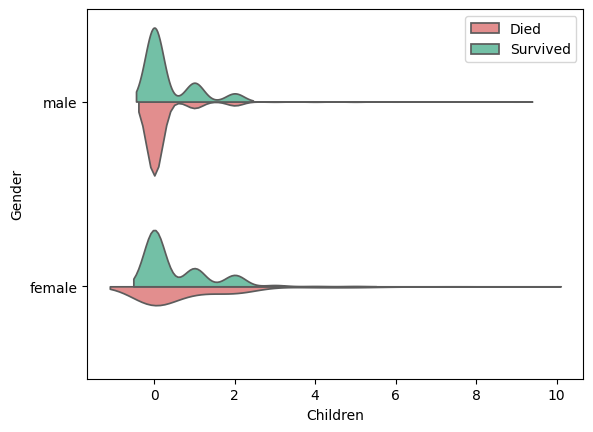

In [128]:
children_plot = sns.violinplot(df, y="Sex", x="Parch", split=True, hue="Survived", inner=None, palette=[died_color, survived_color])
children_plot.set_xlabel("Children")
children_plot.set_ylabel("Gender")
children_plot.legend(["Died", "Survived"])
plt.gca().invert_yaxis()

---

## Sex / Age

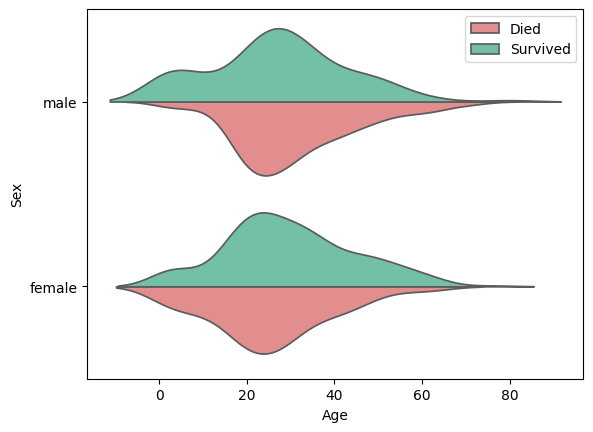

In [129]:
sexage = sns.violinplot(df, x="Age", y="Sex", split=True, hue="Survived", inner=None, palette=[died_color, survived_color])
sexage.legend(["Died", "Survived"])
plt.gca().invert_yaxis()

---

## Sex / Pclass

### Relation between Sex and Pclass

In [130]:
# Gender and Class colors:
female_first_class_colors = ["#FF3333","#FF6666", "#FF9999", "#FFCCCC"] # (red)
female_second_class_colors = ["#FF9933" ,"#FFB266", "#FFCC99", "#FFE5CC"] # (orange)
female_third_class_colors = ["#FFFF33","#FFFF66", "#FFFF99", "#FFFFCC"] # (yellow)
male_first_class_colors = ["#99FF33", "#B2FF66", "#CCFF99", "#E5FFCC"] # (light green)
male_second_class_colors = ["#33FF33", "#66FF66", "#99FF99", "#CCFFCC"] # (green)
male_third_class_colors = ["#33FF99", "#66FFB2", "#99FFCC", "#CCFFE5"] # (blue/green)

In [131]:
gender_class_survived = df.groupby(by=['Sex', 'Pclass', 'Survived' ])['Survived'].count()
gender_class_survived

Sex     Pclass  Survived
female  1.0     0.0           5
                1.0         139
        2.0     0.0          12
                1.0          94
        3.0     0.0         110
                1.0         106
male    1.0     0.0         118
                1.0          61
        2.0     0.0         146
                1.0          25
        3.0     0.0         418
                1.0          75
Name: Survived, dtype: int64

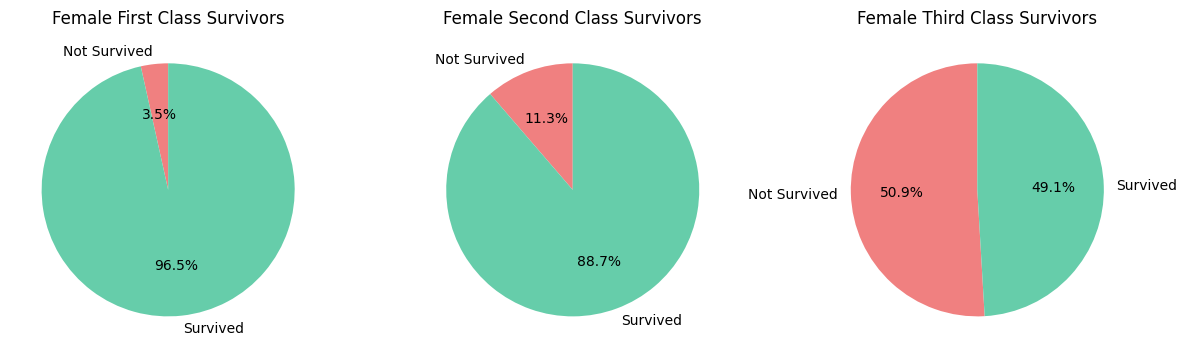

In [132]:
plt.figure(figsize=(12, 4))  

# Female First class
plt.subplot(1, 3, 1)
female_first_class = gender_class_survived.get("female")[1]
plt.title("Female First Class Survivors")
plt.pie(
    female_first_class, 
    labels=["Not Survived", "Survived"], 
    autopct='%1.1f%%', 
    colors=[died_color,survived_color],
    startangle=90,
        )

# Female Second class
plt.subplot(1, 3, 2)
female_second_class = gender_class_survived.get("female")[2]
plt.title("Female Second Class Survivors")
plt.pie(
    female_second_class, 
    labels=["Not Survived", "Survived"], 
    autopct='%1.1f%%', 
    colors=[died_color,survived_color],
    startangle=90,
        )

# Female Third class
plt.subplot(1, 3, 3)
female_third_class = gender_class_survived.get("female")[3]
plt.title("Female Third Class Survivors")
plt.pie(
    female_third_class, 
    labels=["Not Survived", "Survived"], 
    autopct='%1.1f%%', 
    colors=[died_color,survived_color],
    startangle=90,
        )
 
plt.tight_layout() 
plt.show()

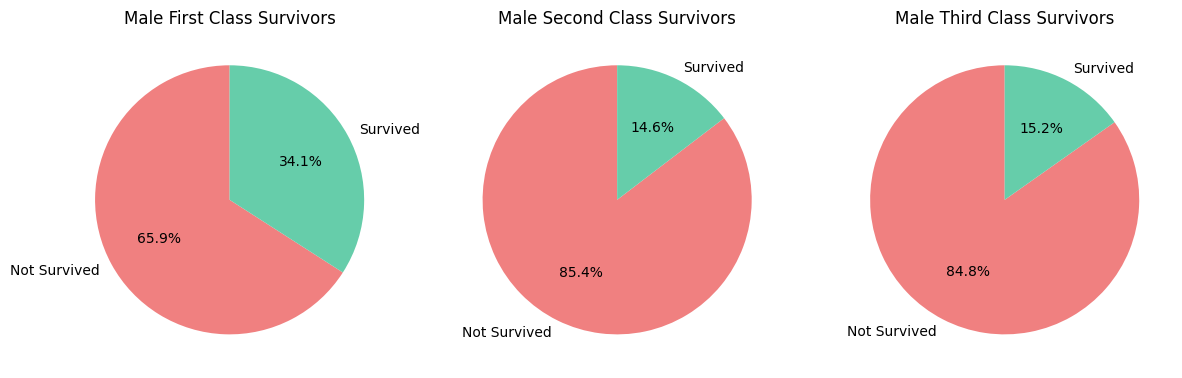

In [133]:
plt.figure(figsize=(12, 4))

# Male First class
plt.subplot(1, 3, 1)
male_first_class = gender_class_survived.get("male")[1]
plt.title("Male First Class Survivors")
plt.pie(
    male_first_class, 
    labels=["Not Survived", "Survived"], 
    autopct='%1.1f%%', 
    colors=[died_color,survived_color],
    startangle=90,
        )

# Male Second class
plt.subplot(1, 3, 2)
male_second_class = gender_class_survived.get("male")[2]
plt.title("Male Second Class Survivors")
plt.pie(
    male_second_class, 
    labels=["Not Survived", "Survived"], 
    autopct='%1.1f%%', 
    colors=[died_color,survived_color],
    startangle=90,
        )

# Male Third class
plt.subplot(1, 3, 3)
male_third_class = gender_class_survived.get("male")[3]
plt.title("Male Third Class Survivors")
plt.pie(
    male_third_class, 
    labels=["Not Survived", "Survived"], 
    autopct='%1.1f%%', 
    colors=[died_color,survived_color],
    startangle=90,
        )

plt.tight_layout()
plt.show()

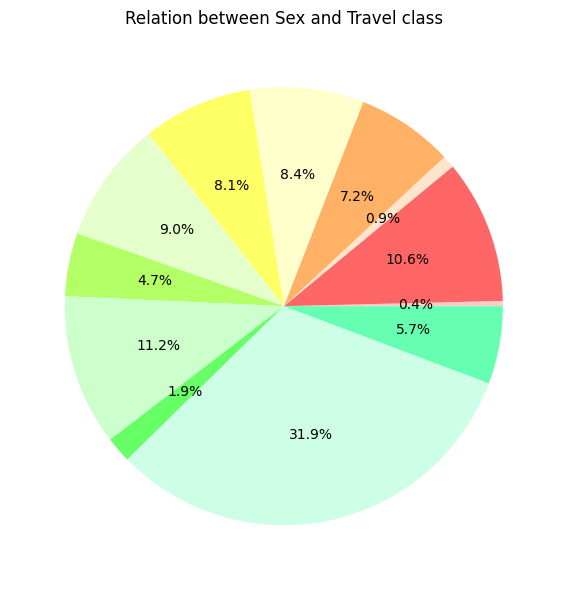

In [134]:
#Count
class_gender_survived = df.groupby(by=['Sex', 'Pclass', 'Survived'])['Survived'].count()

plt.figure(figsize=(8, 6)) 

first_class = class_survived.get([1,2,3,'male', 'female'])
plt.title("Relation between Sex and Travel class")
plt.pie(class_gender_survived, 
        autopct='%1.1f%%', 
        colors=[
            female_first_class_colors[3],female_first_class_colors[1],
            female_second_class_colors[3],female_second_class_colors[1],
            female_third_class_colors[3],female_third_class_colors[1],
            male_first_class_colors[3],male_first_class_colors[1],
            male_second_class_colors[3],male_second_class_colors[1],
            male_third_class_colors[3],male_third_class_colors[1],
        ],
        #startangle=90,
        #counterclock=False
        )

plt.tight_layout() 
plt.show()



---

## Age / Pclass

<Axes: xlabel='Pclass', ylabel='Age'>

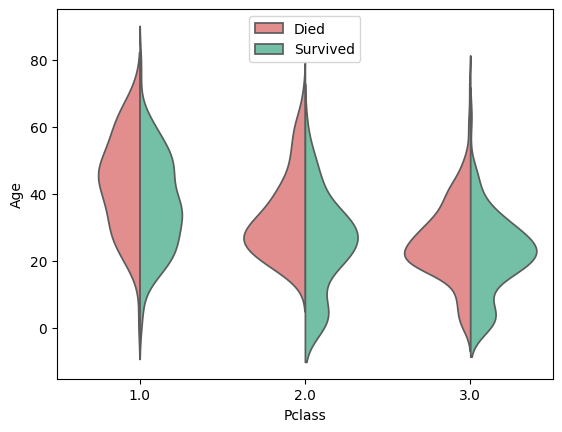

In [135]:
vp = sns.violinplot(df, y="Age", x="Pclass", split=True, hue="Survived", inner=None, palette=[died_color, survived_color])
vp.legend(["Died", "Survived"])
vp

##### Having a child seems to became a "nuisance" for women, as the lower the women with children, the higher the survival percentage was.

---

## Sex / Parch / Pclass

---

## Sex / Age / Pclass

---

## Sex / Parch / Age / Pclass

---

## Heatmap

In [136]:
df['SexEncoded'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [137]:
df['Embarked_C'] =  df['Embarked'].apply(lambda x: 1 if x == 'C' else 0)
df['Embarked_Q'] =  df['Embarked'].apply(lambda x: 1 if x == 'Q' else 0)
df['Embarked_S'] =  df['Embarked'].apply(lambda x: 1 if x == 'S' else 0)

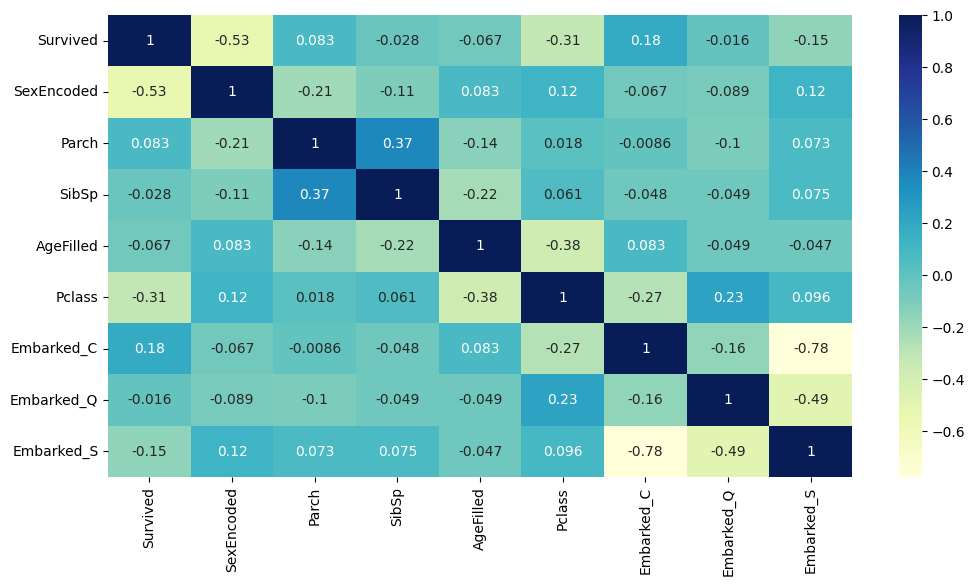

In [138]:
heatmap_df = df[['Survived','SexEncoded','Parch','SibSp','Fare', 'AgeFilled', 'Pclass','Embarked_C','Embarked_Q','Embarked_S' ]]

plt.figure(figsize=(12, 6)) 

dataplot = sns.heatmap(heatmap_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)

plt.show()

<Figure size 800x600 with 0 Axes>

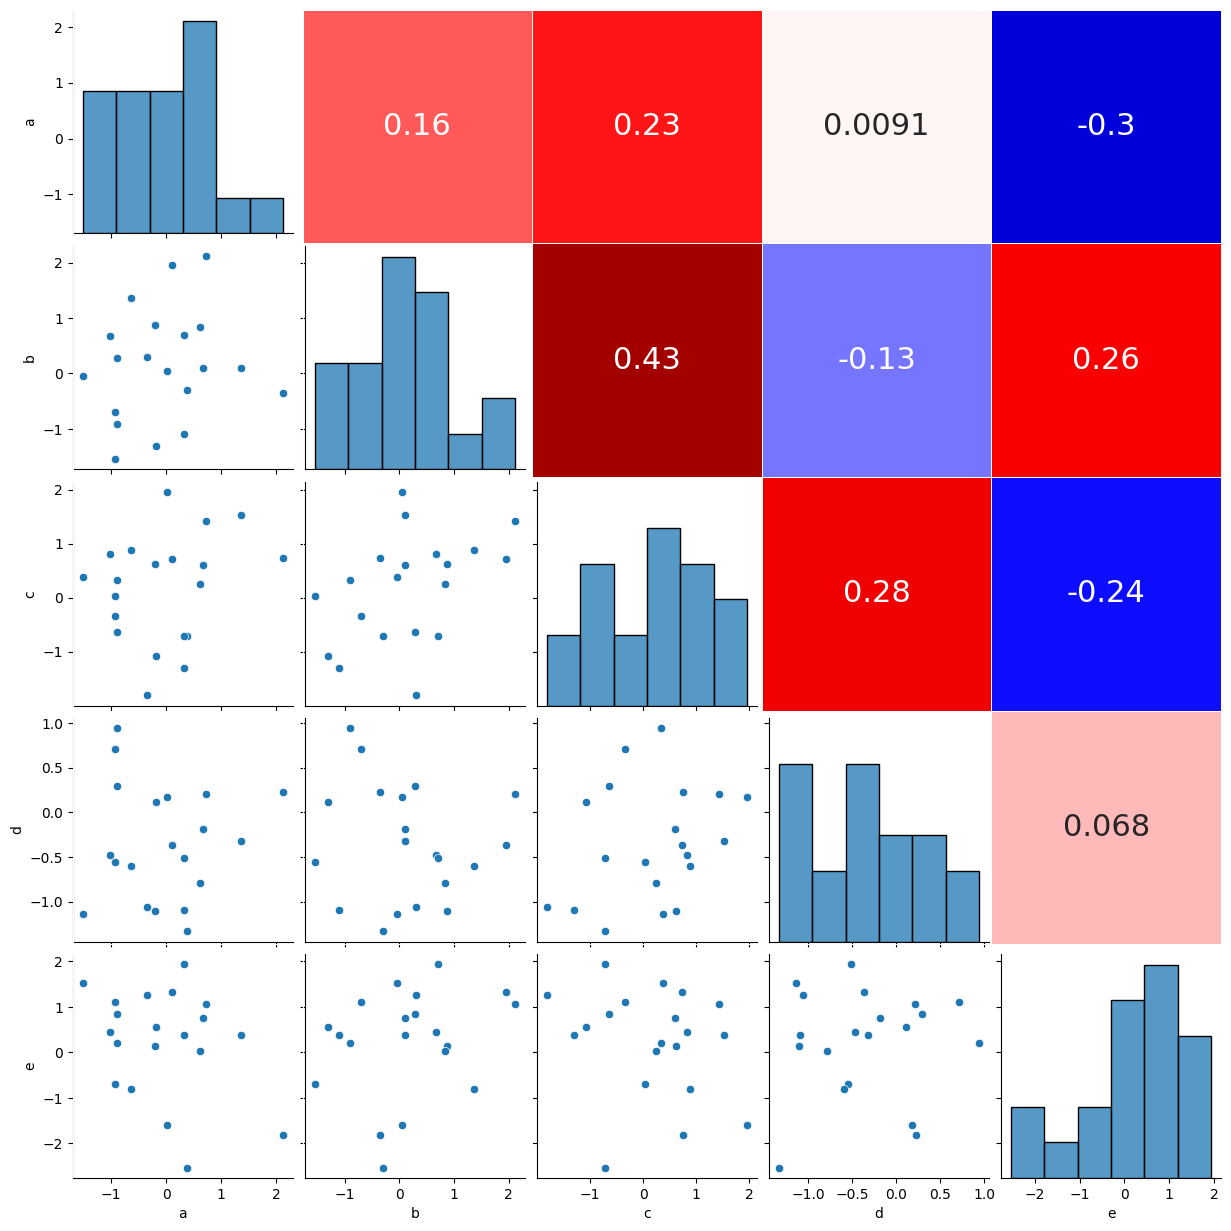

In [139]:

def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

    
plt.figure(figsize=(8, 6)) 

rs = np.random.RandomState(112358)
d1 = pd.DataFrame(data=rs.normal(size=(20, 5)), columns=[*'abcde'])

e = sns.pairplot(d1)
e.map_upper(hide_current_axis)

(xmin, _), (_, ymax) = e.axes[0, 0].get_position().get_points()
(_, ymin), (xmax, _) = e.axes[-1, -1].get_position().get_points()

ax = e.fig.add_axes([xmin, ymin, xmax - xmin, ymax - ymin], facecolor='none')

corr1 = d1.corr()
mask1 = np.tril(np.ones_like(corr1, dtype=bool))
sns.heatmap(corr1, mask=mask1, cmap='seismic', vmax=.5, vmin=-.5,
            linewidths=.5, cbar=False, annot=True, annot_kws={'size': 22}, ax=ax)
ax.set_xticks([])
ax.set_yticks([])
# ax.xaxis.tick_top()
# ax.yaxis.tick_right()

plt.show()

---

## ML

In [140]:
df.head()

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,home.dest,Title,Ageavg,AgeFilled,Died,LifeStage,SexEncoded,Embarked_C,Embarked_Q,Embarked_S
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,"211,3375",B5,...,"St Louis, MO",Miss.,21.774207,29.0000,0.0,Adult,0,0,0,1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,"151,5500",C22 C26,...,"Montreal, PQ / Chesterville, ON",Master.,5.482704,0.9167,0.0,Child,1,0,0,1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,"151,5500",C22 C26,...,"Montreal, PQ / Chesterville, ON",Miss.,21.774207,2.0000,1.0,Child,0,0,0,1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,"151,5500",C22 C26,...,"Montreal, PQ / Chesterville, ON",Mr.,32.252151,30.0000,1.0,Adult,1,0,0,1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,"151,5500",C22 C26,...,"Montreal, PQ / Chesterville, ON",Mrs.,36.994118,25.0000,1.0,Adult,0,0,0,1


In [141]:
df_model = df.select_dtypes(include='number').drop(columns=['body', 'Age', 'Died', 'Ageavg', 'Embarked_C', 'Embarked_Q', 'Embarked_S'])
df_model['AgeFilled'] = np.log(df_model['AgeFilled'])
df_model

,Pclass,Survived,SibSp,Parch,AgeFilled,SexEncoded
0,1.0,1.0,0.0,0.0,3.367296,0
1,1.0,1.0,1.0,2.0,-0.086975,1
2,1.0,0.0,1.0,2.0,0.693147,0
3,1.0,0.0,1.0,2.0,3.401197,1
4,1.0,0.0,1.0,2.0,3.218876,0
...,...,...,...,...,...,...
1304,3.0,0.0,1.0,0.0,2.674149,0
1305,3.0,0.0,1.0,0.0,3.080726,0
1306,3.0,0.0,0.0,0.0,3.277145,1
1307,3.0,0.0,0.0,0.0,3.295837,1


In [142]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      1309 non-null   float64
 1   Survived    1309 non-null   float64
 2   SibSp       1309 non-null   float64
 3   Parch       1309 non-null   float64
 4   AgeFilled   1309 non-null   float64
 5   SexEncoded  1309 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 71.6 KB


In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [144]:
train, test = train_test_split(
    df_model,
    test_size= 0.25,
    random_state= 0,
    stratify= df[['Survived', 'SexEncoded', 'LifeStage']]
    )

In [145]:
train_x = train.drop(columns= 'Survived')
train_y = train['Survived']

test_x = test.drop(columns='Survived')
test_y = test['Survived']

In [146]:
model = LogisticRegression(max_iter = 10000)

model.fit(train_x, train_y)

LogisticRegression(max_iter=10000)

In [147]:
prediction = model.predict(test_x)
metrics.accuracy_score(prediction, test_y)
metrics.accuracy_score(prediction, test_y)

0.8079268292682927

In [148]:
cf_matrix = metrics.confusion_matrix(test_y, prediction)
cf_matrix



array([[179,  23],
       [ 40,  86]])

---